<a href="https://colab.research.google.com/github/shijisimon/EDA/blob/main/fooddelivery_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

#Geospatial Analysis Libraries
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from textblob import TextBlob


#Miscellaneous libraries
from collections import defaultdict
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00


In [8]:
#Reading the data
delivery=pd.read_csv('/onlinedeliverydata.csv')

#Printing the information of dataset
print ("The shape of the  data is (row, column):"+ str(delivery.shape))
print(delivery.info())

The shape of the  data is (row, column):(388, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 n

In [9]:
delivery.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


Insights

We can understand that there are more categorical variables and very less continuous variables

There is also longitude and latitude variable which can help us for geospatial analysis

Most of the variables has likert scale classes inside the variable , it needs to be encoded

In [10]:
delivery.describe()


,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


Insights:

We have 388 respondents(records) in our dataset

Age of the respondents vary between 18-33 with an average of 25

Family size of respondents vary between 1-6 with an average of 3

Lat, Long and Pincode shouldn't be considered for the numerical variable as they don't provide much values from such measures.

Pivot Table analysis-Pandas
Now we use pivot_table function from pandas to crunch the numbers and check if there are any relationship between variables exists.

Demographic analysis 1

In [11]:
#Pivot table
delivery_pivot1=pd.pivot_table(delivery,index=["Gender","Marital Status"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len], margins=True)

#Adding color gradient 
cm = sns.light_palette("green", as_cmap=True)
delivery_pivot1.style.background_gradient(cmap=cm)

Insights:

Average age of female, male and single is around 23 and 27,28 for married female and male respectively

Average family size is 4 for a female respondent and 3 for male.

There are more male respondents(bachelor/married) than in the case of female

Demographic analysis 2

In [14]:
#Pivot table
delivery_pivot2=pd.pivot_table(delivery,index=["Educational Qualifications","Occupation"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len,np.std])

#Adding bar for numbers
delivery_pivot2.style.bar()


Insights:

Female respondents who has only till school education or uneducated are mostly house wives on an average and they aren't much young

Also we can find that most of them are self employeed when they are uneducated

Graduates and Phd's are most employeed and most of graduates and Phd's are still students

We have higher deviation incase of school educated as the uncertainities are high about their career. Also Phd's who are employed also have higher deviation.

Demographic analysis 3

In [22]:
#Pivot table
delivery_pivot3=pd.pivot_table(delivery,index=["Occupation","Monthly Income"],
                               values=['Age','Family size'],
                               aggfunc=[np.mean,len,np.std])
#Adding style
delivery_pivot3.style.bar()   



Insights:

As the age increases the wage also increase along with the family size.

Employee who received below Rs.10000 have higher deviation in age and family size

There are nearly 178 students who has no income responded to this data

The next highest responses were from employees who's salary is between Rs.25000-Rs50000 or can we say campus hired graduates who are in their first year of work ?

Time factor analysis 1

In [23]:
#Pivot table
delivery_pivot4=pd.pivot_table(delivery,index=["Order Time","Maximum wait time"],
                               values=['Age','Family size'],columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)

#Adding color gradient
cm = sns.light_palette("blue", as_cmap=True)
delivery_pivot4.style.background_gradient(cmap=cm)


Insights:

There are no influence in time of delivery when they can wait for 60 or more than 60 minutes for an order
There is an high influence of time of delivery where the buyer can wait only for 30-45 mins.

There aren't much purchasers who buys during weekdays only

Even during waiting purchasers can wait a max of 40 mins.

Time factor analysis 2

In [27]:
#Pivot table
delivery_pivot4=pd.pivot_table(delivery,index=["Medium (P1)","Perference(P1)"],
                               columns=['Influence of time'],
                               aggfunc={'Influence of time':len},
                               fill_value=0)
#Adding color gradient
delivery_pivot4.style.bar()
  

Insights:

Nearly 224 people who order Nonveg on apps are influenced by time . Also there are more nonveg food preference than veg food preference on apps
There isn't much data for other types of medium and influence in time of delivery

EDA

<ipython-input-28-ab58967fd3ea>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-ab58967fd3ea>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




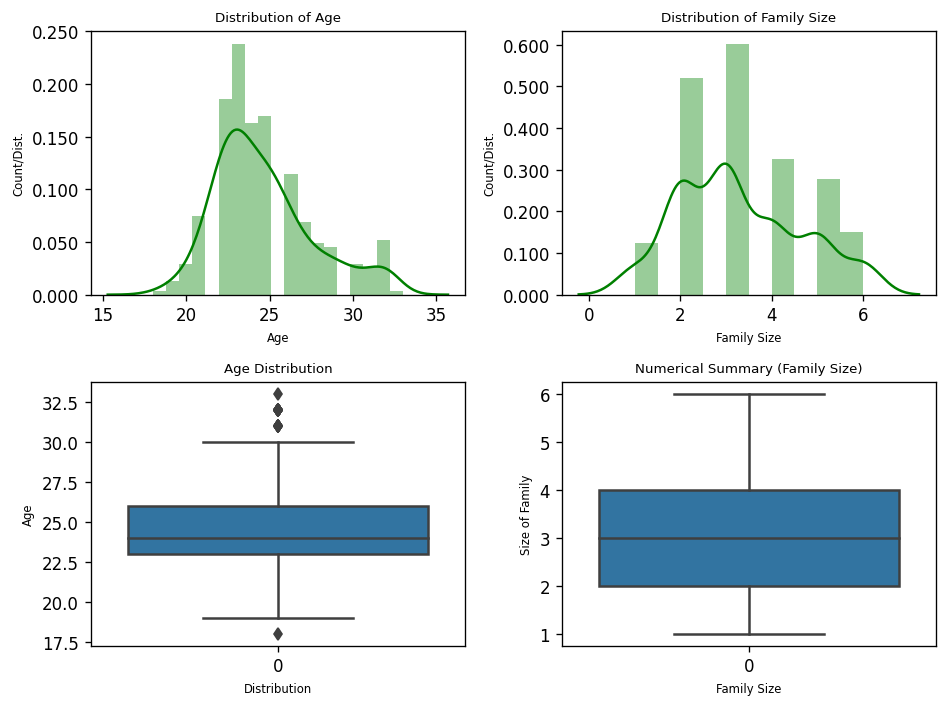

In [28]:
#Univariate Analysis
#Here we take each variable and analyse one by one through seaborn and matplotlib plots

#Setting up the frame 
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))

#Distribution of age with displot
plot00=sns.distplot(delivery['Age'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Age',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

#Distribution of Familysize with displot
plot01=sns.distplot(delivery['Family size'],ax=axes[0][1],color='green')
axes[0][1].set_title('Distribution of Family Size',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Family Size',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.tight_layout()

#Age-Boxplot
plot10=sns.boxplot(delivery['Age'],ax=axes[1][0])
axes[1][0].set_title('Age Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Distribution',fontdict={'fontsize':7})
axes[1][0].set_ylabel(r'Age',fontdict={'fontsize':7})
plt.tight_layout()

#FamilySize-Boxplot
plot11=sns.boxplot(delivery['Family size'],ax=axes[1][1])
axes[1][1].set_title(r'Numerical Summary (Family Size)',fontdict={'fontsize':8})
axes[1][1].set_ylabel(r'Size of Family',fontdict={'fontsize':7})
axes[1][1].set_xlabel('Family Size',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

Insights:

Age and Family Size are normally distributed

Age average is between 23-25 and the Family Size average is around 3

There are some outliers incase of Age

<ipython-input-29-21693dc3cf7e>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



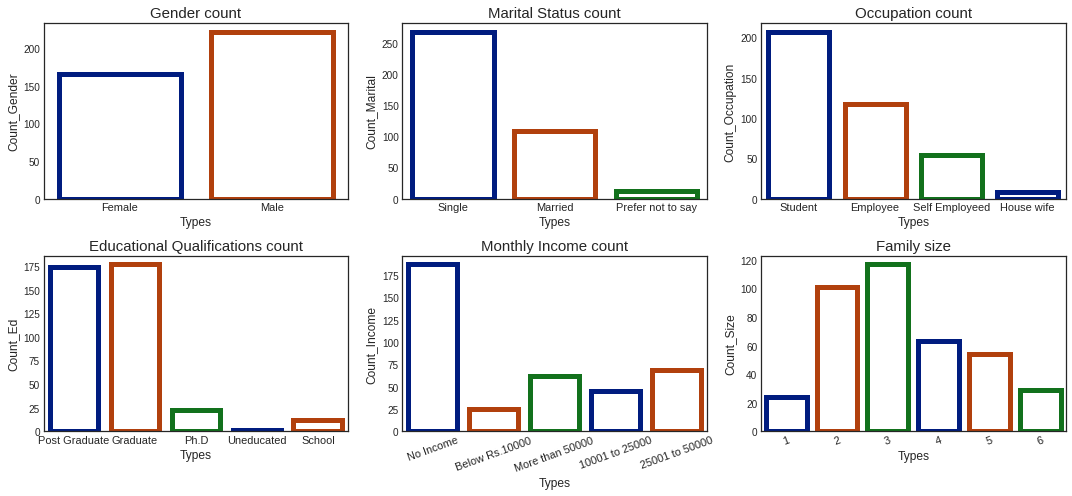

In [29]:
#Demographic Analysis
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Gender Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Gender", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Gender count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Gender', fontsize = 12)
plt.tight_layout()

#Marital Status Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Marital Status", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Marital Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Marital', fontsize = 12)
plt.tight_layout()

#Occupation Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Occupation", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Occupation count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Occupation', fontsize = 12)
plt.tight_layout()

#Education Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Educational Qualifications", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Educational Qualifications count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Ed', fontsize = 12)
plt.tight_layout()

#Income Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Monthly Income", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Monthly Income count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Income', fontsize = 12)
plt.tight_layout()

#Family Size Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Family size", data=delivery,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Family size',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Size', fontsize = 12)
plt.tight_layout()

Insights:

Normal distribution exists for family distribution where most of the family size (number of people staying with you) recorded were in the 3 people followed by 2. We can make an assumption that these respondents are mostly bachelors staying in hostel or PG and generally they are less likely to cook food in their room.

It can also be seen that nearly 57% of the respondents were male and 43%of the respondents were male and the data is almost balanced here.

The education qualification of respondents where highly from the young graduates (177) followed by post graduates (174) and it also covers Ph.D. Scholars, School children and Uneducated people.

Most of the respondents comes under the No income bracket which supports the age variable as most of them are students and they don’t have regular income. 

The next highest income bracket is between Rs 25001 to 50000 which is a nominal salary for a fresher in corporate industry. Considering the occupation, the data has more student respondent which supports the previous analysis and it is followed by employee respondents.
 The data also covers respondents who are self-employed and home makers. 
 Most of the respondents are bachelors who are students and there are significantly lesser number from married respondents.

<ipython-input-30-ad5e41dff323>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



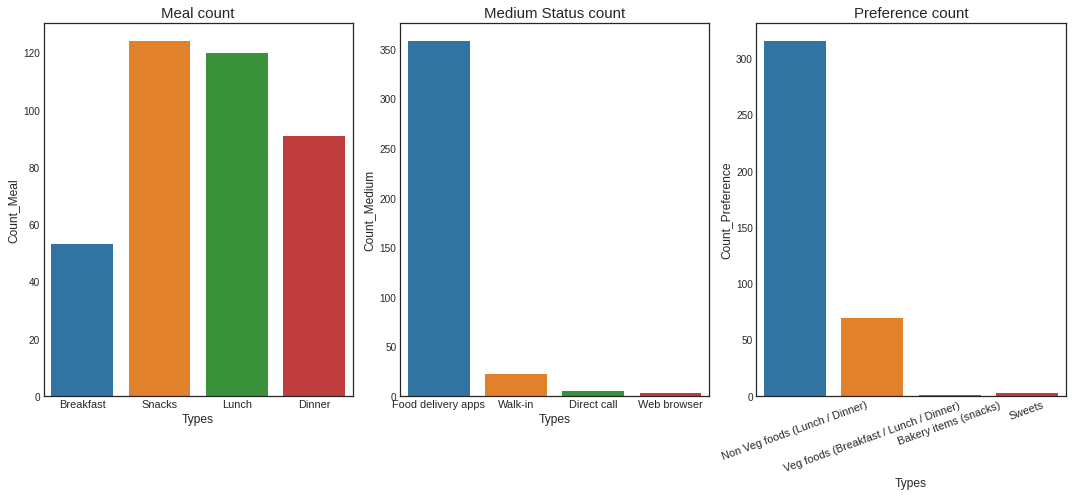

In [30]:
#Consumer preferences
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')

#Meal Countplot
plt.subplot(1,3,1)
ax = sns.countplot(x="Meal(P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Meal count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Meal', fontsize = 12)
plt.tight_layout()

#Medium Countplot
plt.subplot(1,3,2)
ax = sns.countplot(x="Medium (P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Medium Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Medium', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(1,3,3)
ax = sns.countplot(x="Perference(P1)", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Preference count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()


Insights:

The data for consumer preferences on which meal of the day, type of meal and medium to purchase food can be seen. Most of the preferences belongs to food delivery applications when it comes to medium of purchase followed by Walking and very few numbers for direct call and web browser and generally people prefer ordering food for lunch and snack items followed by dinner and lowest is for ordering breakfast. Nonveg is the most preferred type of meal followed by veg food and minimum numbers on sweets and bakery items.

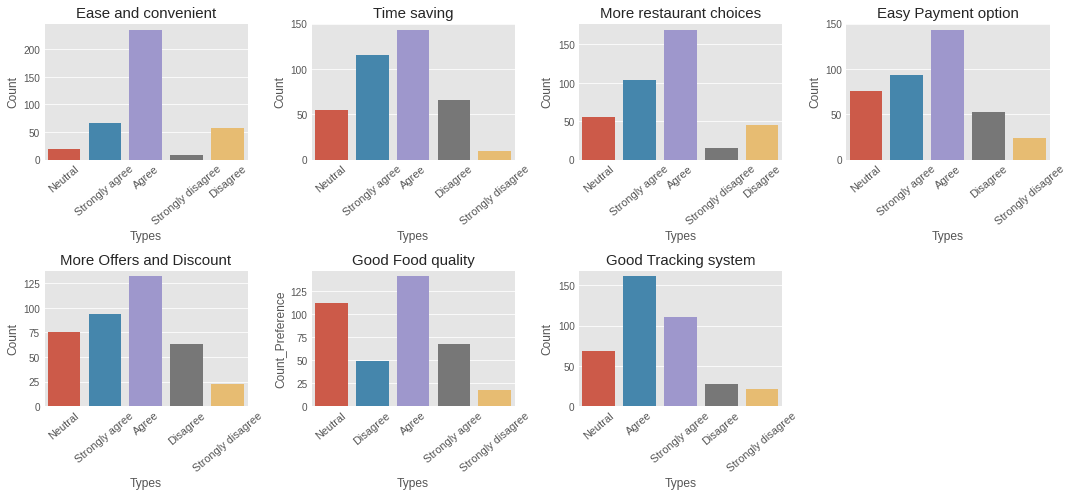

In [31]:
#Purchase Demand
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

#Ease and convenient Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Ease and convenient", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Ease and convenient',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Time saving", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Time saving',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Restaurant Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="More restaurant choices", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More restaurant choices',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Payment Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Easy Payment option", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Easy Payment option',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Offers Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="More Offers and Discount", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More Offers and Discount',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Food quality", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Food quality',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Tracking Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Good Tracking system", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Tracking system',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()


Insights:

It can be seen demand factors which pulls the consumer to purchase an order from application. We can see that ease and convenient while using an app for ordering are agreed much for influencing them to make an order. Also, the time saving factor has most response as nearly 258 respondents agree that using application to order is time saving. Respondents agree that they also order because of the restaurant choices provided in the application. Easy Payment also makes a significant contribution as 143 respondents agree that they consider this factor for the order demand.Majority of the respondents agree that quantity of food they get also plays a role in their order but there are nearly 112 respondents who are neutral in that case and people also point out that the tracking system is feasible and if it is really well designed that would make them to purchase via food delivery apps

<ipython-input-32-704be8231aa1>:4: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



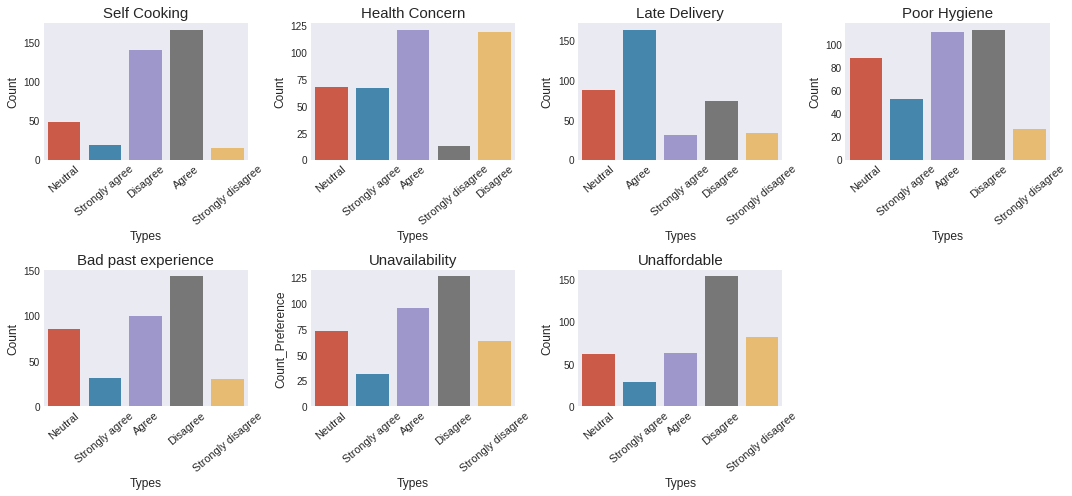

In [32]:
#Restriction in order demand
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-dark')

#Self cooking Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Self Cooking", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Self Cooking',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Health Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Health Concern", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Health Concern',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Late delivery Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Late Delivery", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Late Delivery',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Poor Hygiene", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Poor Hygiene',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Past Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Bad past experience", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Bad past experience',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Unavailability Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Unavailability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Unavailability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Unaffordable Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Unaffordable", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Unaffordable',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()


Insights:

It is all the factors that are considered to hinder people from ordering on food delivery applications. Majority of the people agree that self-cooking makes them not to order food on applications, but it is also followed by 140 people who disagree with that statement as well. Majority has agreed that health reason was one of the important criteria which restricts them from ordering but in case of hygiene factor many disagreed that the food is poor, so hygiene doesn’t restrict people from ordering. Majority have also disagreed that past food ordering experience doesn’t influence their current order demand. Also, around 163 respondents have agreed that late delivery does influence their order decision. Respondents have disagreed that unaffordability and unavailability doesn’t stop them from ordering. Most of the food are available at good offers and people have wide variety of choices to get their favourite food.

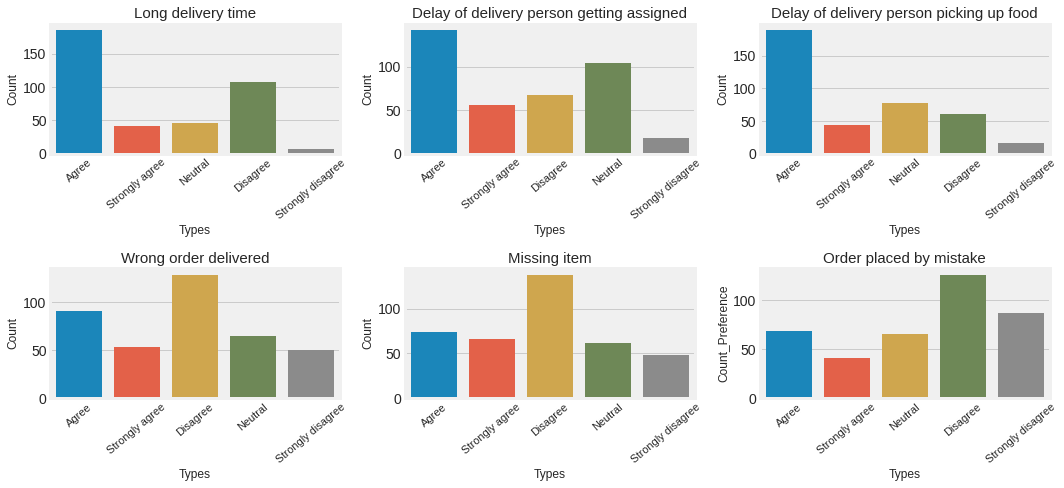

In [34]:
#Influence in Cancellation of order
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')


#Long delivery time Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Long delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Long delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person getting assigned Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Delay of delivery person getting assigned", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person getting assigned',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person picking up food Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Delay of delivery person picking up food", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person picking up food',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Wrong order delivered Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Wrong order delivered", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Wrong order delivered',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Missing item Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Missing item", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Missing item',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order placed by mistake Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Order placed by mistake", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order placed by mistake',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()


Insights:

People feel that long time in the delivery is highly influencing them to cancel their ongoing order. Plus, they also agree that delay in delivery person getting assigned to them and delay in delivery person picking up the food contributes to their decision of cancelling the order. But on the other hand, majority of the respondents don’t cancel their order of they have any missing item or wrong item being delivered as they will know about the issue once the order gets delivered and they can’t cancel at that point.

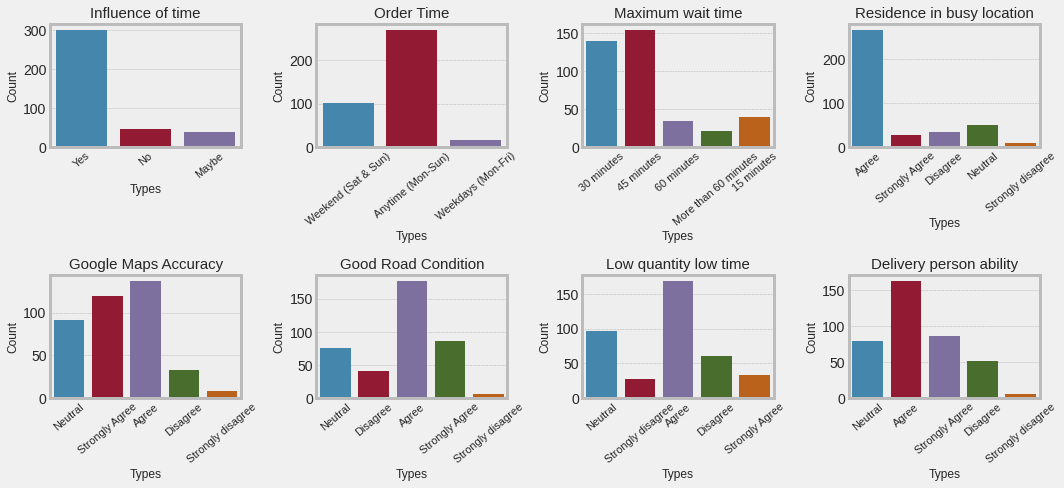

In [35]:
#Time factors in order demand¶
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of time Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Influence of time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Order Time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order Time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Maximum wait time Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Maximum wait time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Maximum wait time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Residence in busy location", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Residence in busy location',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Accuracy Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Google Maps Accuracy", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Google Maps Accuracy',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Road Condition Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Road Condition", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Road Condition',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Low quantity low time Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Low quantity low time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Low quantity low time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delivery person ability Countplot
plt.subplot(2,4,8)
ax = sns.countplot(x="Delivery person ability", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delivery person ability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

Insights:

Majority of respondents votes yes that their order has an influence with respect to the time of entire process. Nearly 269 respondents expressed that they order anytime in week and followed by the next highest on weekends and weekday order. Also, respondents have conveyed that the maximum wait time by majority is 45 minutes followed by 30 and 60-minutes wait time to receive their order.Majority of the people agreed that they reside in a busy location and many strongly agree that their google maps of their location is accurate. Nearly 169 people have the perception that if they order low quantity their order gets delivered faster as the cooking time is minimum. Now many residents in Bangalore feel that they are staying in a location where the road conditions are good. Also, majority think that it is up to the delivery person to figure out the location and delivery the order at the shortest possible time.

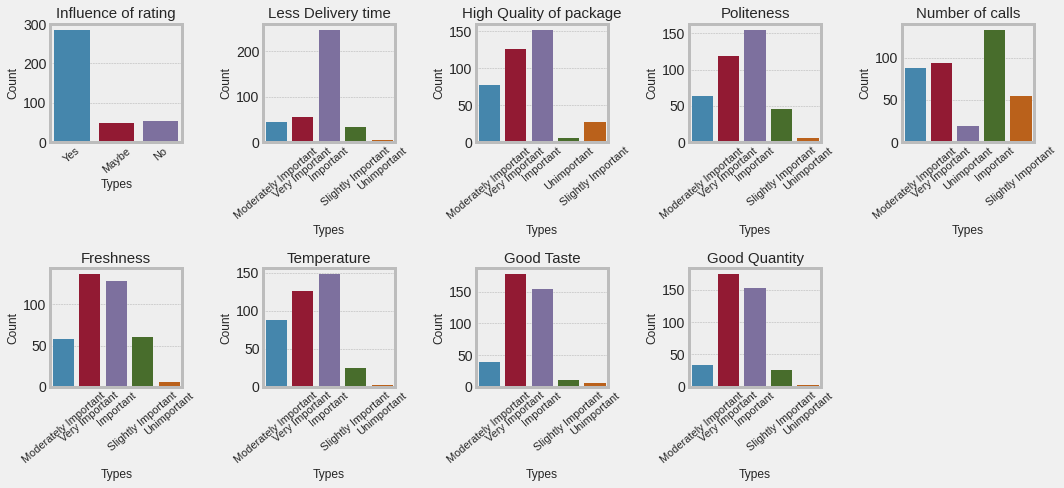

In [36]:
#Importance of rating post delivery
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of rating Countplot
plt.subplot(2,5,1)
ax = sns.countplot(x="Influence of rating", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of rating',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Less Delivery time Countplot
plt.subplot(2,5,2)
ax = sns.countplot(x="Less Delivery time", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Less Delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#High Quality of package Countplot
plt.subplot(2,5,3)
ax = sns.countplot(x="High Quality of package", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('High Quality of package',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Politeness Countplot
plt.subplot(2,5,4)
ax = sns.countplot(x="Politeness", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Politeness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Number of calls Countplot
plt.subplot(2,5,5)
ax = sns.countplot(x="Number of calls", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Number of calls',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Freshness Countplot
plt.subplot(2,5,6)
ax = sns.countplot(x="Freshness ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Freshness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Temperature Countplot
plt.subplot(2,5,7)
ax = sns.countplot(x="Temperature", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Temperature',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Taste Contplot
plt.subplot(2,5,8)
ax = sns.countplot(x="Good Taste ", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Taste',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Quantity Countplot
plt.subplot(2,5,9)
ax = sns.countplot(x="Good Quantity", data=delivery)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Quantity',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()


Insights:

Nearly 286 respondents have agreed ‘Yes’ that Majority of the people consider quality of package as important for the rating of delivery. Also, lesser delivery time is considered to be an important factor while giving rating. When it comes to the delivery person, majority consider number of calls made and politeness are considered important factor by majority of respondent. Usually the delivery person will make more calls if there are any issue and they are less polite if they feel the delivery process is difficult and that in turn reflects their rating.Majority of them are positive and consider all the factors as important for rating the restaurant. Now looking into each picture, we can see that majority of the people are considering freshness as a very important factor when it comes to rating, they also see temperature as an important factor but not that important as customers can understand that food is being delivered at a time span. Many consumers are considering good quantity and good taste as a very important factor there are very few around 9 who feels that they are unimportant.